<center><h1> Exploratory Data Analysis of car dataseet 

In this notebook, I will explore and analyze my data, visuliaze connections between features and do some statistic manipulations to show main characteristics of data. First I will import data, that "page-scarper.py" got from [cars.kg](cars.kg) and saved in "cars_raw_data.csv". I called raw, because later I will clean the data: fill missing values, detect and maybe eliminate outliers, and rescale data(standartization, normalization).

I will import pandas, which is a library for data analysis, and you can see first 5 rows and last five raws of the data.

In [2]:
import pandas as pd 
import sys
sys.path.append("../")
from src.data_extraction import load_or_save_dataset
pd.set_option('float_format', '{:.3f}'.format)

car_data = load_or_save_dataset.get_raw_dataset()
car_data.head(5)

,Год выпуска,КПП,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Цвет,Цена
0,1995.000,механика,150.000,2.000,задний,nan,NaN,седан,бензин,бордовый,4900
1,1993.000,автомат,125.000,2.800,полный подключаемый,268701.000,правый,внедорожник / пикап,дизель,синий,6000
2,1997.000,автомат,190.000,2.000,NaN,220000.000,правый,седан,бензин,серебряный,3100
3,2009.000,механика,298.000,3.000,полный подключаемый,120000.000,левый,универсал,дизель,черный,17000
4,2004.000,механика,160.000,3.000,полный подключаемый,200000.000,левый,внедорожник / пикап,дизель,темно-синий,7000


In [3]:
car_data.tail(5)

,Год выпуска,КПП,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Цвет,Цена
7355,2005.000,механика,265.000,2.500,постоянный полный,200000.000,правый,кроссовер,бензин,синий,9000
7356,2002.000,автомат,160.000,2.400,передний,270000.000,правый,минивэн / бус,бензин,белый жемчуг,5000
7357,2002.000,механика,116.000,1.800,передний,nan,левый,универсал,бензин,серый,2700
7358,2005.000,автомат,175.000,2.500,постоянный полный,230000.000,левый,универсал,бензин,синий,7800
7359,2012.000,автомат,nan,2.500,передний,139000.000,левый,седан,бензин,черный,16500


The very first thing I do, is check the shape of our dataframe. As you can see above there are 7360 rows (examples) and 11 columns (features). And function below confirms this. 

In [4]:
car_data.shape

(7360, 11)

Next we can see the quantity of missing values in each of the columns. We can see that some of the features have a lot of missing values, and some not so much. I will go three ways, first I will create a model with a dataset where all the NaN values were dropped, and second I will impute all the missing NaN values and the third I will try to make maximum unbiased dataset, managing the data as a field expert. All of the three datasets will have different level of bias, I will explore it in 'Choosing-Dataset' notebook.


In [5]:
car_data.isnull().sum()

Год выпуска      96
КПП             177
Мощность       1588
Объём           250
Привод          622
Пробег         2358
Руль            404
Тип кузова       20
Топливо         162
Цвет            593
Цена              0
dtype: int64

Next I would like to see detailed statistical summary of data. From the summary, we can see that mean of data and standard deviation have extreme values, and looking at max values at dataset, I can suggest that maximum values skewed the mean and std methods, later I will eliminate or impute those extreme values in dataset, also in next summary we can see the datatype of each column that we have.

In [6]:
car_data.describe()

,Год выпуска,Мощность,Объём,Пробег,Цена
count,7264.000,5772.000,7110.000,5002.000,7360.000
mean,2005.280,1925003420886.618,117997.289,1846469696291871.500,124513.892
std,7.055,146249479561645.750,8440245.233,130412158247654512.000,9013470.731
min,1961.000,1.000,0.000,1.000,0.000
25%,2001.000,136.000,2.000,39885.000,4000.000
50%,2004.000,180.000,2.400,116339.500,7800.000
75%,2011.000,250.000,3.200,179000.000,18889.750
max,2018.000,11111111111111100.000,705435466.000,9223372036854769664.000,773152600.000


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 11 columns):
Год выпуска    7264 non-null float64
КПП            7183 non-null object
Мощность       5772 non-null float64
Объём          7110 non-null float64
Привод         6738 non-null object
Пробег         5002 non-null float64
Руль           6956 non-null object
Тип кузова     7340 non-null object
Топливо        7198 non-null object
Цвет           6767 non-null object
Цена           7360 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 460.0+ KB


Next, I would want to see the correlation matrix between each of the continous(numeric) features. By now looking at summary above, I now know that dataset has extreme values in the data, each one of continious variables contains extreme values, which we need to eliminate, or make it NaN and impute, because if we won't, it will make a huge affect on correlations and predictions. In the plot below we can see that correlation between continous variables is very low, it is due to the skewed data. There is no meaining at keeping analysis with this kind of data, at first I will eliminate extreme values just to see important relationships, I will not change dataset, the dataset will be changed and cleaned in "Data-Cleaning" notebook. I will clean data by "cleaning-outliers.py" script, by eliminating meaningless data, like: impossible mileage, capacity or engine power.

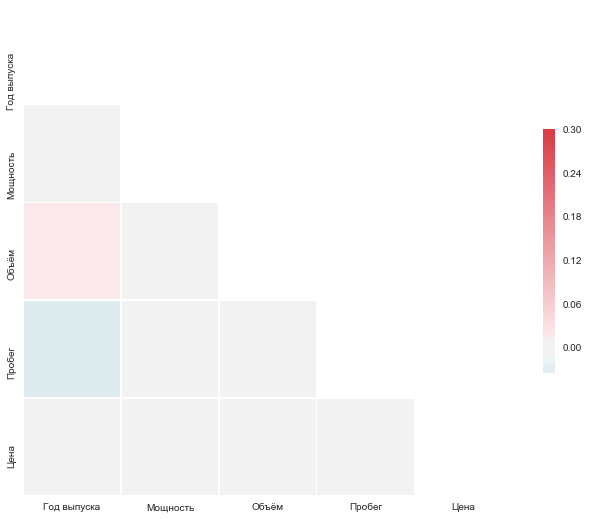

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def plot_heatmap(data):
    sns.set(style = "white")
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_heatmap(car_data)

In the dataset categorical features don't have extreme values, and continuous feature "Год выпуска" doesn't have extreme values too. I think it is due to the way people could post advertisements. Categorical features and year feature could be inputed via selection, and continous numbers could be of any range.

In [9]:
car_data.isnull().sum()

Год выпуска      96
КПП             177
Мощность       1588
Объём           250
Привод          622
Пробег         2358
Руль            404
Тип кузова       20
Топливо         162
Цвет            593
Цена              0
dtype: int64

Now I will download data cleaned from outliers and impossible values, and we can see that number of NaN values increased, I made some extreme values NaN, so later i could impute that data. After, I will drop some non-needed values.

In [10]:
car_data = load_or_save_dataset.get_cleaned_outliers_dataset()

In [11]:
car_data.isnull().sum()

Год выпуска      90
КПП             159
Мощность       1615
Объём           407
Привод          587
Пробег         2308
Руль            371
Тип кузова       19
Топливо         147
Цвет            563
Цена              0
dtype: int64

Now we can continue our Exploritary Analysis. And right away we can see, that all statistic summary now makes full sense. And correlation plotting now is a little bit more reassuring.

In [12]:
car_data.describe()

,Год выпуска,Мощность,Объём,Пробег,Цена
count,7064.000,5539.000,6747.000,4846.000,7154.000
mean,2005.556,202.155,2.700,115579.080,15299.419
std,6.805,90.435,1.092,89462.658,19951.180
min,1961.000,51.000,0.800,1.000,1071.000
25%,2002.000,138.000,2.000,38762.500,4000.000
50%,2004.000,181.000,2.400,113488.000,7900.000
75%,2011.000,250.000,3.000,175000.000,18500.000
max,2018.000,585.000,6.000,756554.000,247569.000


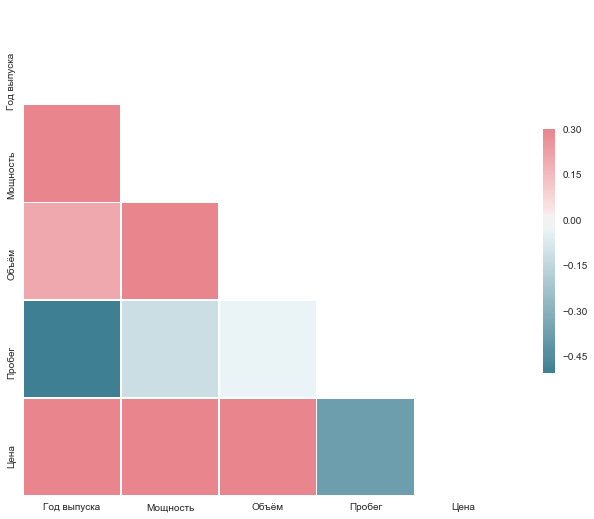

In [13]:
plot_heatmap(car_data)

In [14]:
car_data.corr()

,Год выпуска,Мощность,Объём,Пробег,Цена
Год выпуска,1.000,0.316,0.199,-0.507,0.620
Мощность,0.316,1.000,0.860,-0.116,0.602
Объём,0.199,0.860,1.000,-0.029,0.457
Пробег,-0.507,-0.116,-0.029,1.000,-0.375
Цена,0.620,0.602,0.457,-0.375,1.000


Now it's time to see, which features of dataset are important and which are not so. I am going to use RandomForest Regressor module from scklearn library to analyze importance of features. Also, I wll use OneHotEncoder to make categorical features numeric. I will drop the NaN values for this example, because RandomForestRegressor doesn't take as an input data with missing values. 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from src.data_extraction import get_X_and_y
car_data.dropna(inplace=True)
X_train,X_test,y_train,y_test = get_X_and_y.get_train_test(car_data)
forest = RandomForestRegressor(random_state = 0)
feat_labels = X_train.columns[:-1]
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

    
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), X_train.columns.values), reverse=True))

Features sorted by their score:
[(0.4137, 'Мощность'), (0.4135, 'Год выпуска'), (0.0706, 'Пробег'), (0.0447, 'Объём'), (0.0083, 'КПП_автомат'), (0.0051, 'Тип кузова_внедорожник / пикап'), (0.0043, 'Тип кузова_кроссовер'), (0.0035, 'Тип кузова_седан'), (0.0033, 'Цвет_вишневый'), (0.0032, 'Привод_постоянный полный'), (0.0029, 'Цвет_черный'), (0.0028, 'Топливо_дизель'), (0.0026, 'Цвет_коричневый'), (0.0026, 'Топливо_бензин'), (0.0023, 'Тип кузова_хэтчбек'), (0.0023, 'Привод_задний'), (0.0022, 'Тип кузова_кабриолет'), (0.0018, 'КПП_типтроник'), (0.0013, 'Цвет_белый'), (0.0011, 'Цвет_серый'), (0.001, 'Привод_передний'), (0.001, 'КПП_вариатор'), (0.0009, 'Тип кузова_купе'), (0.0007, 'Привод_полный подключаемый'), (0.0006, 'Цвет_голубой'), (0.0006, 'Тип кузова_минивэн / бус'), (0.0005, 'КПП_механика'), (0.0004, 'Цвет_темно-синий'), (0.0004, 'Цвет_синий'), (0.0003, 'Цвет_серебряный'), (0.0003, 'Топливо_газ-бензин'), (0.0002, 'Цвет_зеленый'), (0.0002, 'Тип кузова_универсал'), (0.0002, 'Руль_пра

Now we will make use of dimensionality reduction algorithm which is called Principal Component Analysis(PCA). It will allow us to reduce the number of dimensions of a dataset. To visualize data I will reduce the number of dimensions to two. At first we will scale the whole dataset so it will have near to equal sizes. We will scale dataset via StandartScaler module of scikit learn module.From this plot we can see the distribution of data, and outliers as well.

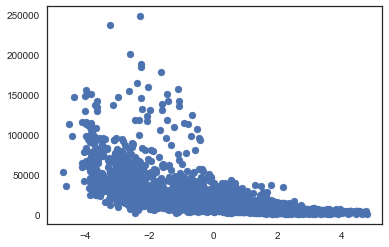

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
pca = PCA(n_components=1,random_state=2)
X_train,X_test,y_train,y_test = get_X_and_y.get_train_test_std(car_data)
ss = StandardScaler()
X_train =ss.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
plt.scatter(X_train,y_train,marker = "o")
plt.show()

In [22]:
car_data.rank().corr('spearman')

,Год выпуска,КПП,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Цвет,Цена
Год выпуска,1.000,0.041,0.225,0.109,0.271,-0.580,-0.455,-0.247,0.036,0.055,0.813
КПП,0.041,1.000,-0.451,-0.441,-0.198,-0.114,-0.144,0.226,-0.031,-0.059,-0.212
Мощность,0.225,-0.451,1.000,0.892,0.434,-0.056,-0.232,-0.472,0.016,0.148,0.622
Объём,0.109,-0.441,0.892,1.000,0.422,0.025,-0.254,-0.563,0.075,0.149,0.533
Привод,0.271,-0.198,0.434,0.422,1.000,-0.094,-0.104,-0.569,0.147,0.097,0.475
Пробег,-0.580,-0.114,-0.056,0.025,-0.094,1.000,0.202,0.094,0.041,0.028,-0.439
Руль,-0.455,-0.144,-0.232,-0.254,-0.104,0.202,1.000,0.220,-0.109,-0.102,-0.488
Тип кузова,-0.247,0.226,-0.472,-0.563,-0.569,0.094,0.220,1.000,-0.192,-0.077,-0.516
Топливо,0.036,-0.031,0.016,0.075,0.147,0.041,-0.109,-0.192,1.000,0.040,0.125
Цвет,0.055,-0.059,0.148,0.149,0.097,0.028,-0.102,-0.077,0.040,1.000,0.108


We finished the exlporitary analysis of our data. Next thing I will do is a cleaning the data.